In [21]:
!pip install pytesseract
!apt-get install -y tesseract-ocr
!sudo apt-get install tesseract-ocr-nep

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
import torch
from collections import Counter
from transformers import AutoModelForTokenClassification, AutoTokenizer


model = AutoModelForTokenClassification.from_pretrained("../model/V1/saved_model")
tokenizer = AutoTokenizer.from_pretrained("../model/V1/tokenizer_saved_model")


In [1]:
import pytesseract
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
os.environ['TESSDATA_PREFIX'] = r'C:\Program Files\Tesseract-OCR\tessdata'

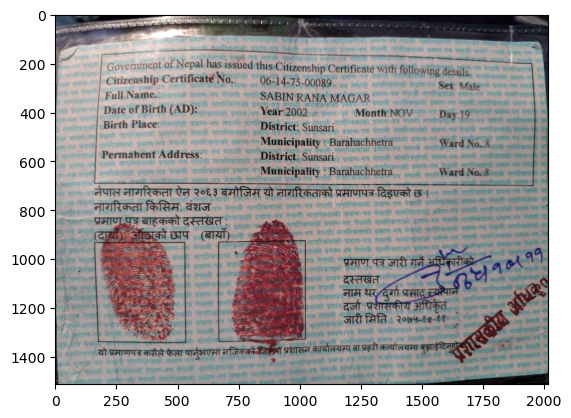

In [4]:

image_back = cv2.imread("../data/back6.jpg")
plt.imshow(image_back)

In [5]:
custom_config = r'--oem 3 --psm 6'
back_text = pytesseract.image_to_string(image_back, config=custom_config)

In [6]:
print(back_text)

" c Dc — a
| Goyemment of Nepal has issued this Citizenship Certificate with following details.
|! | Citizenship Certificaté No.: 06-14-75-00089 Sex Mate
Full Name.: SABIN RANA MAGAR
Date of Birth (AD): Year:2002 Month: NOV Day 19
Birth Place: District: Sunsari -
Municipality : Barahachhetra Ward No..8
Permahent Address: District; Sunsari
Municipality : Barahachhetra Ward No.8
AUT ATTA Vat EZ SANSA AI Aaah WATS fesvenl s
Arita Paar: deter :
ee eae ci)
i zy, % Br ne : eS i
Cf City EAS re be AMS alae aT) SATe_ ss Ss
D piig fee J 4 L Pa SF
i. eh eee SRT FATA ; ois-8e-8k
/ + > . ’ SR Ein , a -
BY MRTOTES ater tar Tne STTAT afar ae RIT Hat TATA AT SURRY HAT CAAT ,



In [7]:
unwanted = ";:{}[]()|,~=+_-—.«*‘“"
translator = str.maketrans('', '', unwanted)
cleaned_text = back_text.translate(translator)
cleaned_text = " ".join(cleaned_text.split())
print(cleaned_text)

" c Dc a Goyemment of Nepal has issued this Citizenship Certificate with following details ! Citizenship Certificaté No 06147500089 Sex Mate Full Name SABIN RANA MAGAR Date of Birth AD Year2002 Month NOV Day 19 Birth Place District Sunsari Municipality Barahachhetra Ward No8 Permahent Address District Sunsari Municipality Barahachhetra Ward No8 AUT ATTA Vat EZ SANSA AI Aaah WATS fesvenl s Arita Paar deter ee eae ci i zy % Br ne eS i Cf City EAS re be AMS alae aT SATe ss Ss D piig fee J 4 L Pa SF i eh eee SRT FATA ois8e8k / > ’ SR Ein a BY MRTOTES ater tar Tne STTAT afar ae RIT Hat TATA AT SURRY HAT CAAT


In [8]:
try:
    try :
        start_index = cleaned_text.lower().index("details")
        truncated_text = cleaned_text[start_index:]

    except (ValueError, StopIteration):
        start_index = cleaned_text.lower().index("government")
        truncated_text = cleaned_text[start_index:]


    split_text = truncated_text.split()


    ward_index = next(i for i, word in enumerate(split_text) if word.lower() == 'ward')


    result_words = split_text[:ward_index + 20]
    result = ' '.join(result_words)
    
except (ValueError, StopIteration):
    print(ValueError, StopIteration)
    result = cleaned_text


print(result)

details ! Citizenship Certificaté No 06147500089 Sex Mate Full Name SABIN RANA MAGAR Date of Birth AD Year2002 Month NOV Day 19 Birth Place District Sunsari Municipality Barahachhetra Ward No8 Permahent Address District Sunsari Municipality Barahachhetra Ward No8 AUT ATTA Vat EZ SANSA AI Aaah WATS fesvenl s


In [9]:
import re
import string

def split_token(token):
    """
    Splits tokens that have mixed letter/digit or mixed-case patterns.
    For example:
      - "Year2003" -> ["Year", "2003"]
      - "MonthJUN" -> ["Month", "JUN"]
    """
    # Insert a space between a lowercase letter followed by an uppercase letter.
    token = re.sub(r'([a-z])([A-Z])', r'\1 \2', token)
    parts = []
    # Split each part into groups of letters or digits.
    for part in token.split():
        parts.extend(re.findall(r'[A-Za-z]+|\d+', part))
    return parts

def clean_text(text):
    """
    Processes the OCR text by:
      1. Splitting on whitespace.
      2. Removing extraneous punctuation.
      3. Splitting tokens that have attached numbers or mixed-case patterns.
      4. Filtering out any tokens that are empty or purely punctuation.
    Returns a list of cleaned tokens.
    """
    raw_tokens = text.split()
    cleaned_tokens = []
    for token in raw_tokens:
        # Remove any leading/trailing punctuation.
        token = token.strip(string.punctuation)
        if not token:
            continue
        # Split tokens like 'Year2003' into separate parts.
        sub_tokens = split_token(token)
        # Only add non-empty tokens.
        cleaned_tokens.extend([sub for sub in sub_tokens if sub])
    return cleaned_tokens

# Example OCR text.
ocr_text = result

cleaned_tokens = clean_text(ocr_text)
sentence = " ".join(cleaned_tokens)
print(sentence)


details Citizenship Certificat No 06147500089 Sex Mate Full Name SABIN RANA MAGAR Date of Birth AD Year 2002 Month NOV Day 19 Birth Place District Sunsari Municipality Barahachhetra Ward No 8 Permahent Address District Sunsari Municipality Barahachhetra Ward No 8 AUT ATTA Vat EZ SANSA AI Aaah WATS fesvenl s


In [ ]:
try:

    start_index = cleaned_text.lower().index("government")
    truncated_text = cleaned_text[start_index:]

    new_start_index = truncated_text.lower().index("details")
    new_truncated_text = truncated_text[new_start_index:]


    split_text = new_truncated_text.split()


    ward_index = next(i for i, word in enumerate(split_text) if word.lower() == 'ward')


    result_words = split_text[:ward_index + 15]
    result = ' '.join(result_words)
except (ValueError, StopIteration):
    print(ValueError, StopIteration)
    result = cleaned_text

print(result)